<a href="https://colab.research.google.com/github/pavankumarjnnce/Information_Science_Engg/blob/main/Linedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wwang/ML_CV_Teaching.git

Cloning into 'ML_CV_Teaching'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 168 (delta 20), reused 47 (delta 9), pack-reused 110
Receiving objects: 100% (168/168), 81.87 MiB | 17.14 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
import ML_CV_Teaching.lane_detection.lane_pkg as lp

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


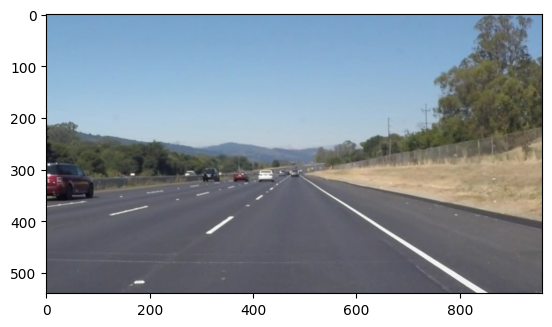

In [3]:
#reading in an image
image = mpimg.imread('ML_CV_Teaching/lane_detection/test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

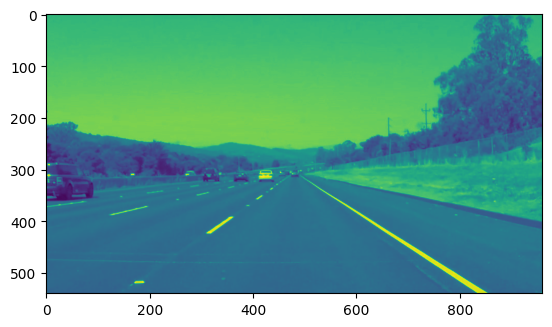

In [4]:
#Grayscale
imshape = image.shape

#Convert to grayscale
grayscaleImage = lp.grayscale(image)
plt.imshow(grayscaleImage)

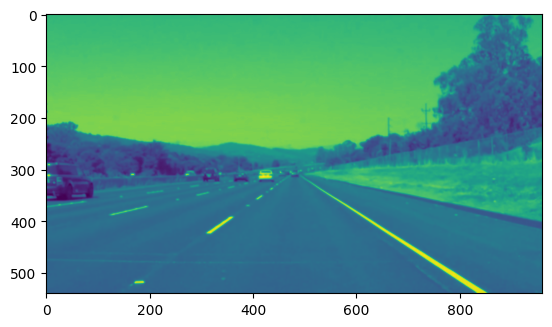

In [5]:
#Apply gaussian blur
gaussianImage = lp.gaussian_blur(grayscaleImage, 5)
plt.imshow(gaussianImage)

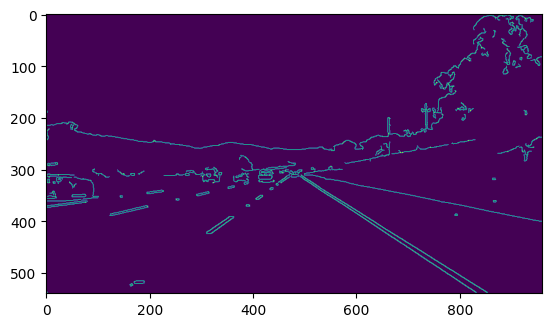

In [6]:
#Find the edges in the image
cannyImage = lp.canny(gaussianImage, 50, 150)
plt.imshow(cannyImage)

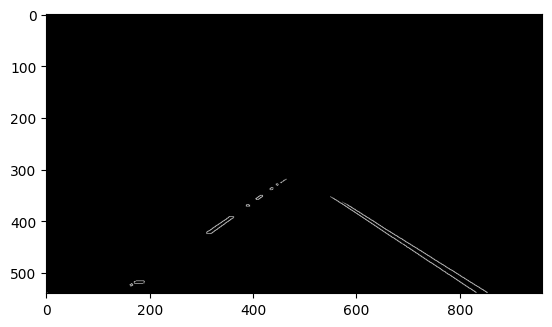

In [8]:
#Remove unused edges
#Limit to a region of interest, in this case the lanes
roiMask = lp.gen_roi_mask(imshape) #np.array([[(0, imshape[0]), (465, 320), (475, 320), (imshape[1], imshape[0])]], dtype=np.int32)
edgeMask = lp.region_of_interest(cannyImage, roiMask)
#Only the required edges are displayed and rest is set to black
edgeMaskImage = cv2.cvtColor(edgeMask, cv2.COLOR_GRAY2BGR)
plt.imshow(edgeMaskImage)

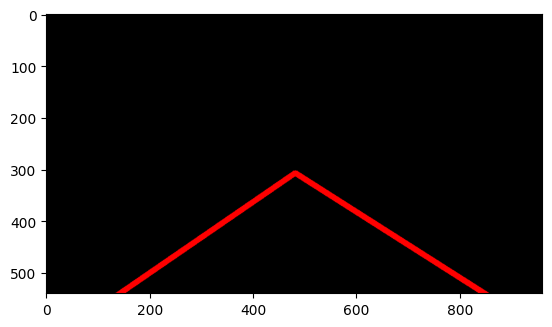

In [10]:
#Hough lines transform to detect straight lines and then highlight the detected line
#rho = 2
#theta = np.pi/180
#threshold = 15
#min_line_len = 40
#max_line_gap = 20
linesImage = lp.hough_lines(edgeMask)
plt.imshow(linesImage)

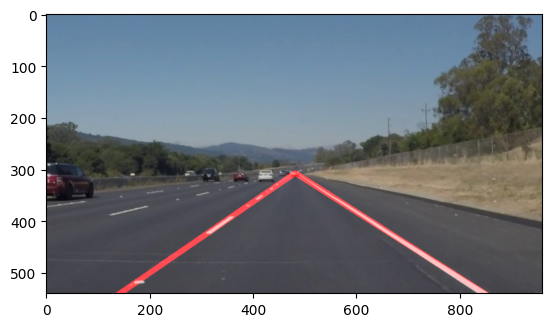

In [11]:
#Add highlight back to original image

marked_img = cv2.addWeighted(image, 0.8, linesImage, 1, 0)
plt.imshow(marked_img)